In [72]:
import numpy as np
import pandas as pd
from numpy.random import randn
#Stats
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [73]:
dataset = randn(25)

(0, 1)

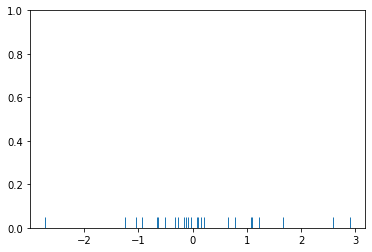

In [74]:
sns.rugplot(dataset)
plt.ylim(0,1)

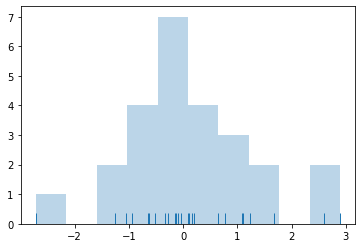

In [75]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

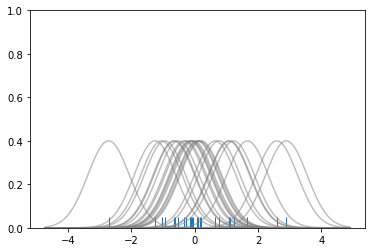

In [76]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4 * dataset.std()**5) / (3 * len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha = 0.5)
    
    plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

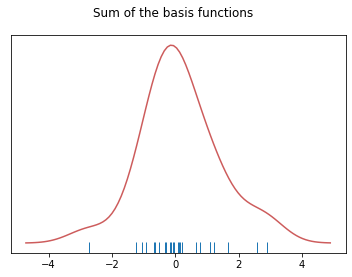

In [77]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

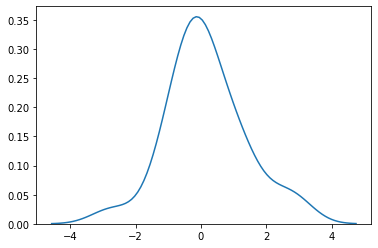

In [78]:
sns.kdeplot(dataset)

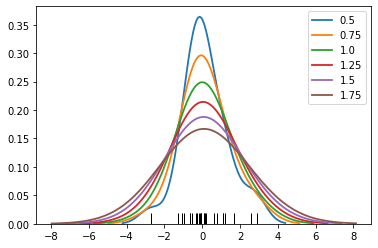

In [79]:
sns.rugplot(dataset,color = 'black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw = bw,lw = 1.8, label = bw)

In [80]:
url = 'https://en.wikipedia.org/wiki/Kernel-(statistic)'



/Users/zhimengwang/.conda/envs/default/lib/python3.7/site-packages/seaborn/distributions.py:296: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)
/Users/zhimengwang/.conda/envs/default/lib/python3.7/site-packages/seaborn/distributions.py:296: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)
/Users/zhimengwang/.conda/envs/default/lib/python3.7/site-packages/seaborn/distributions.py:296: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)
/Users/zhimengwang/.conda/envs/default/lib/python3.7/site-packages/seaborn/distributions.py:296: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)
/Users/zhimengwang/.conda/envs/default/lib/python3.7/site-packages/seaborn/distributions.py:296: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)
/Users/zhimengwang/.conda/envs/default/lib/python3

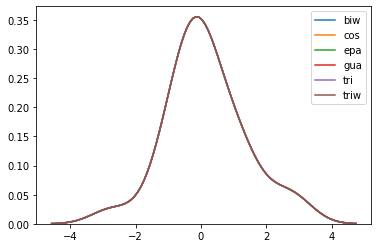

In [81]:
kernel_options = ['biw','cos','epa','gua','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern,label = kern)